<a href="https://colab.research.google.com/github/mandar-solanki/GAN-exercises/blob/main/GAN_1021_Day_1_GAN_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
# Loading Github Repo
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd gdrive/My Drive/project_folder/AI-Fundamentals-Updated
! git pull


Mounted at /content/gdrive
/content/gdrive/My Drive/project_folder/AI-Fundamentals-Updated
Already up to date.


# Handwritten Digits Generator With a GAN: https://realpython.com/generative-adversarial-networks/

<span style="font-family:Papyrus; font-size:2.5em;">Generative Adversarial Networks (GANs)</span>
---
![](https://espresso-jobs.com/conseils-carriere/wp-content/uploads/2019/05/monalisa.gif)
<br>

# Introduction

- Generative Adversarial Networks (GANs)
- How GANs Work
- GANs Process
- Examples

![image.png](attachment:image.png)

![image-2.png](attachment:image-2.png)

### Generative Adversarial Networks (GANs)

Generative Adversarial Networks are used to generate images that never existed before. They learn about the world (objects, animals and so forth) and create new versions of those images that never existed.

They have two components:

- A **Generator** - this creates the images.
- A **Discriminator** - this assesses the images and tells the generator if they are similar to what it has been trained on. These are based off real world examples.

When training the network, both the generator and discriminator start from scratch and learn together.

### How GANs Work


**G** for **Generative** - this is a model that takes an input as a random noise singal and then outputs an image.

![](https://camo.githubusercontent.com/a2c5a0db812c0ade199e5ccacf86c6cff4db1685/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f67656e657261746976652e706e67)

**A** for **Adversarial** - this is the discriminator, the opponent of the generator. This is capable of learning about objects, animals or other features specified. For example: if you supply it with pictures of dogs and non-dogs, it would be able to identify the difference between the two.

![](https://camo.githubusercontent.com/96c8ccb9a91b8789106c1b3dfc9d62dde9d3cbe1/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f6469736372696d696e61746f722d6578616d706c652e706e67)

Using this example, once the discriminator has been trained, showing the discriminator a picture that isn't a dog it will return a 0. Whereas, if you show it a dog it will return a 1.

![](https://camo.githubusercontent.com/8b5978b05b5ab4cd9bfba4819a0f0e09a12c8068/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f6469736372696d696e61746f722d73636f7265732e706e67)

**N** for **Network** - meaning the generator and discriminator are both neural networks.


### GANs Process

**Step 1** - we input a random noise signal into the generator. The generator creates some images which is used for training the discriminator. We provide the discriminator with some features/images we want it to learn and the discriminator outputs probabilities. These probabilities can be rather high as the discriminator has only just started being trained. The values are then assessed and identified. The error is calculated and these are backpropagated through the discriminator, where the weights are updated.

![](https://camo.githubusercontent.com/a26a06e2437514df1bbd736480f06a86aabebef8/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f73746570312d6469736372696d696e61746f722e706e67)

Next we train the generator. We take the batch of images that it created and put them through the discriminator again. We do not include the feature images. The generator learns by tricking the discriminator into it outputting false positives.

The discriminator will provide an output of probabilities. The values are then assessed and compared to what they should have been. The error is calculated and backpropagated through the generator and the weights are updated.

![](https://camo.githubusercontent.com/07a68fab0dbea632b29d6186e298a6c05333497c/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f73746570312d67656e657261746f722e706e67)

**Step 2** - This is the same as step 1 but the generator and discriminator are trained a little more. Through backpropagation the generator understands its mistakes and starts to make them more like the feature.

This is created through a *Deconvolutional Neural Network*.

### Examples

**GANs** can be used for the following:

- Generating Images
- Image Modification
- Super Resolution
- Assisting Artists
- Photo-Realistic Images
- Speech Generation
- Face Ageing

<br>
**[It’s Training Cats and Dogs: NVIDIA Research Uses AI to Turn Cats Into Dogs, Lions and Tigers, Too](https://blogs.nvidia.com/blog/2018/04/15/nvidia-research-image-translation/)**
<img src="https://blogs.nvidia.com/wp-content/uploads/2018/04/cats-dogs-nvresearch1.png" height="700" width="500">
<br>
<img src="https://cdn-images-1.medium.com/max/800/1*HaExieykcOT5oI2_xKisrQ.png" height="700" width="500">


In [2]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [3]:
torch.manual_seed(111)

# Preparing the Training Data
The MNIST dataset consists of 28 × 28 pixel grayscale images of handwritten digits from 0 to 9. To use them with PyTorch, you’ll need to perform some conversions. For that, you define transform, a function to be used when loading the data:

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [5]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

In [6]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

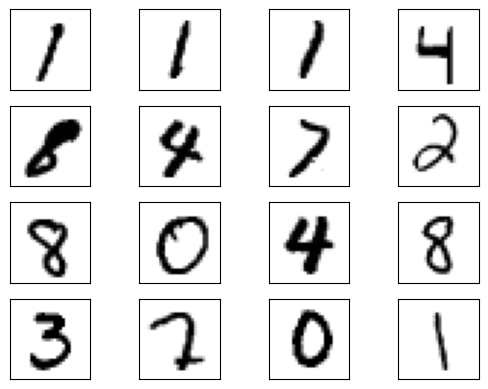

In [7]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

# Implementing the Discriminator and the Generator
In this case, the discriminator is an MLP neural network that receives a 28 × 28 pixel image and provides the probability of the image belonging to the real training data.

You can define the model with the following code:

In [8]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

To input the image coefficients into the MLP neural network, you vectorize them so that the neural network receives vectors with 784 coefficients.

The vectorization occurs in the first line of .forward(), as the call to x.view() converts the shape of the input tensor. In this case, the original shape of the input x is 32 × 1 × 28 × 28, where 32 is the batch size you’ve set up. After the conversion, the shape of x becomes 32 × 784, with each line representing the coefficients of an image of the training set.

To run the discriminator model using the GPU, you have to instantiate it and send it to the GPU with .to(). To use a GPU when there’s one available, you can send the model to the device object you created earlier:



In [9]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [10]:
discriminator = Discriminator().to(device=device)

Since the generator is going to generate more complex data, it’s necessary to increase the dimensions of the input from the latent space. In this case, the generator is going to be fed a 100-dimensional input and will provide an output with 784 coefficients, which will be organized in a 28 × 28 tensor representing an image.

Here’s the complete generator model code:

In [11]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

n line 12, you use the hyperbolic tangent function Tanh() as the activation of the output layer since the output coefficients should be in the interval from -1 to 1. In line 20, you instantiate the generator and send it to device to use the GPU if one is available.

Now that you have the models defined, you’ll train them using the training data.



# Training the Models
To train the models, you need to define the training parameters and optimizers like you did in the previous example:



In [12]:
lr = 0.0001
num_epochs = 10
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

To obtain a better result, you decrease the learning rate from the previous example. You also set the number of epochs to 50 to reduce the training time.

The training loop is very similar to the one you used in the previous example. In the highlighted lines, you send the training data to device to use the GPU if available:



# MIN max Apporach

The min-max approach in Generative Adversarial Networks (GANs) refers to the original objective function proposed by Ian Goodfellow and his colleagues in the seminal GAN paper. This objective function involves two components: a minimization (min) and a maximization (max) that are played out between two neural networks, the generator and the discriminator.

Here's how it works:

1. **Generator (G)**: This network takes random noise as input and tries to generate data samples that are indistinguishable from real data.

2. **Discriminator (D)**: This network tries to distinguish between real data samples and fake data samples generated by the generator.

The objective of GANs is to train both networks simultaneously such that the generator gets better at generating realistic data, while the discriminator gets better at distinguishing real from fake data. This is achieved through a min-max game:

- **Minimization (Generator)**: The generator aims to minimize the probability that the discriminator correctly classifies its generated samples as fake. In other words, it wants to fool the discriminator into thinking its generated samples are real. The generator's loss function is the negative of the discriminator's log probability of making a mistake:
![image.png](attachment:image.png)

![image-3.png](attachment:image-3.png)


- **Maximization (Discriminator)**: The discriminator aims to maximize its ability to correctly classify real and fake samples. Its loss function is the sum of two terms: the log probability of correctly classifying real samples and the log probability of correctly classifying fake samples:


![image-7.png](attachment:image-7.png)

The min-max game continues iteratively, with the generator and discriminator updating their weights based on their respective loss functions. As training progresses, the generator learns to generate more realistic data, while the discriminator becomes better at distinguishing between real and fake samples.

The min-max approach of GANs has been highly influential and has led to many advancements in generative modeling and deep learning.

`zero_grad()` is a method typically used in deep learning frameworks like PyTorch or TensorFlow to reset the gradients of the parameters of a model to zero. This operation is necessary before computing the gradients for a new batch of data during the training process. By zeroing out the gradients, you ensure that the gradients from the previous batch do not accumulate and affect the current batch's gradient computation. This helps in maintaining the correct gradient values for each batch and prevents gradient values from becoming too large or too small, which can lead to training instability.

1. Move Real Samples to Device: The real_samples tensor contains a batch of real data samples. This line moves these samples to the specified device (e.g., CPU or GPU) for computation.

2. Create Labels for Real Samples: The real_samples_labels tensor contains labels for the real samples. In GANs, these labels are typically set to 1 to indicate that these samples are real.

3. Generate Random Noise: The latent_space_samples tensor contains randomly generated noise. This noise is used as input to the generator network to produce fake data samples.

4. Generate Fake Samples: The generated_samples tensor contains fake data samples generated by the generator network using the random noise from latent_space_samples.

5. Create Labels for Fake Samples: The generated_samples_labels tensor contains labels for the generated (fake) samples. In GANs, these labels are typically set to 0 to indicate that these samples are fake.

6. Concatenate Real and Fake Samples: The all_samples tensor is created by concatenating the real and generated samples along the batch dimension. This creates a batch of samples containing both real and fake data.

7. Concatenate Real and Fake Labels: The all_samples_labels tensor is created by concatenating the real and generated sample labels along the batch dimension. This creates a corresponding batch of labels indicating whether each sample is real (1) or fake (0).
        

# Train the discriminator

1. discriminator.zero_grad(): This line clears the gradients of the discriminator's parameters. Gradients are used to update the weights of the neural network during training, and it's important to clear them before computing new gradients in each iteration of the training loop.


2. output_discriminator = discriminator(all_samples): This line passes all the data samples (both real and generated) through the discriminator to obtain its predictions. The discriminator outputs a probability score for each sample, indicating how likely it thinks the sample is real.


3. loss_discriminator = loss_function(output_discriminator, all_samples_labels): Here, the code calculates the loss (or error) of the discriminator's predictions. The loss_function is typically a binary cross-entropy loss, which measures the difference between the predicted probabilities and the actual labels (0 for fake samples, 1 for real samples).


4. loss_discriminator.backward(): This line computes the gradients of the loss with respect to the discriminator's parameters, using backpropagation. These gradients will be used to update the discriminator's weights in the next step.


5. optimizer_discriminator.step(): Finally, the optimizer (e.g., Adam or SGD) updates the discriminator's weights based on the computed gradients, using the learning rate and other optimizer settings. This step is what actually improves the discriminator's ability to distinguish between real and fake samples.

# Train the generator

1. generator.zero_grad(): This line clears the gradients of the generator's parameters. This step is necessary because gradients need to be recalculated for each batch of data samples.


2. generated_samples = generator(latent_space_samples): The generator takes random noise (latent space samples) as input and generates synthetic data samples. These samples will be used to train the generator to produce more realistic data.


3. output_discriminator_generated = discriminator(generated_samples): The generated samples are passed through the discriminator to obtain its predictions. The discriminator's output represents how likely it thinks the generated samples are real.


4. loss_generator = loss_function(output_discriminator_generated, real_samples_labels): This line calculates the loss (or error) of the generator based on the discriminator's predictions for the generated samples. The goal of the generator is to generate samples that the discriminator classifies as real, so the loss is calculated based on the discriminator's output compared to the label indicating the samples are real.


5. loss_generator.backward(): Backpropagation is used to compute the gradients of the loss with respect to the generator's parameters. These gradients will be used to update the generator's weights in the next step.


6. optimizer_generator.step(): The optimizer (e.g., Adam or SGD) updates the generator's weights based on the computed gradients, using the learning rate and other optimizer settings. This step aims to improve the generator's ability to generate realistic data samples over time.

Epoch: 0 Loss D.: 0.5692472457885742
Epoch: 0 Loss G.: 0.47791537642478943


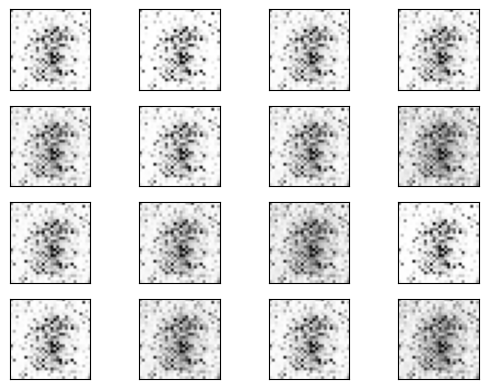

Epoch: 1 Loss D.: 0.024164339527487755
Epoch: 1 Loss G.: 4.6451897621154785


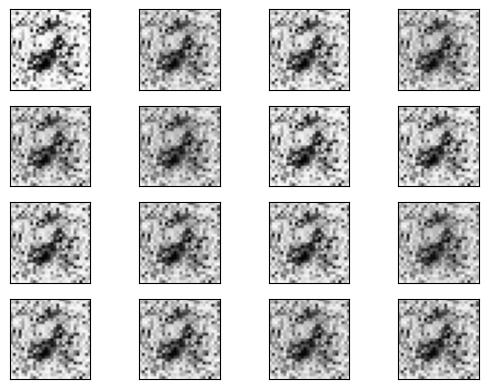

Epoch: 2 Loss D.: 0.004887958522886038
Epoch: 2 Loss G.: 7.105756759643555


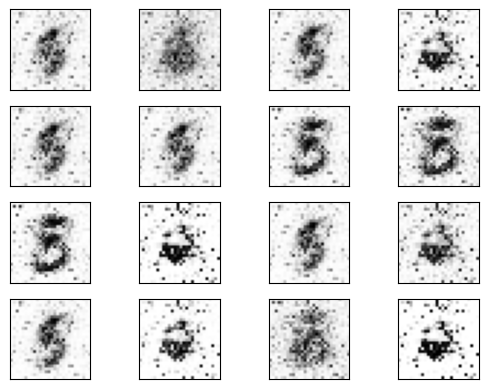

Epoch: 3 Loss D.: 0.07661675661802292
Epoch: 3 Loss G.: 6.489959239959717


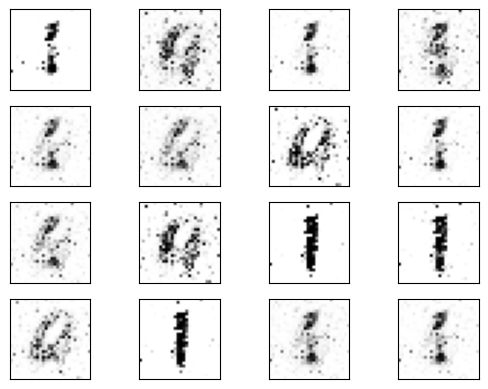

Epoch: 4 Loss D.: 0.05326373875141144
Epoch: 4 Loss G.: 3.929349899291992


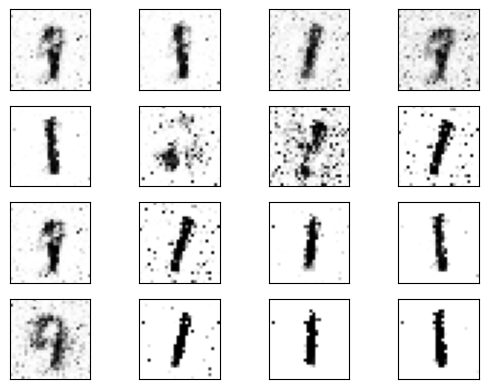

Epoch: 5 Loss D.: 0.04060126841068268
Epoch: 5 Loss G.: 4.057446479797363


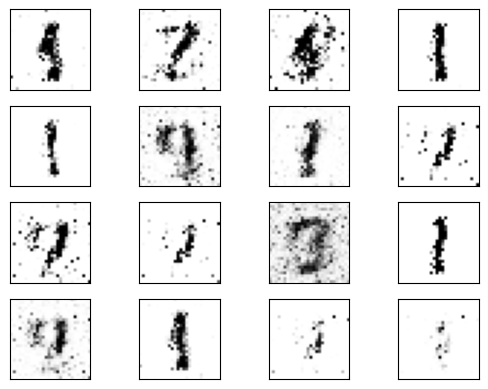

Epoch: 6 Loss D.: 0.26971617341041565
Epoch: 6 Loss G.: 3.661752223968506


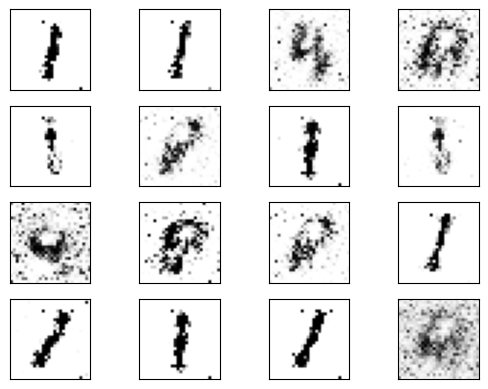

Epoch: 7 Loss D.: 0.3019973337650299
Epoch: 7 Loss G.: 2.7665152549743652


KeyboardInterrupt: 

In [13]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

    latent_space_samples = torch.randn(batch_size, 100).to(device=device)
    generated_samples = generator(latent_space_samples)

    generated_samples = generated_samples.cpu().detach()
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
        plt.xticks([])
        plt.yticks([])
    plt.show()






Some of the tensors don’t need to be sent to the GPU explicitly with device. This is the case with generated_samples in line 11, which will already be sent to an available GPU since latent_space_samples and generator were sent to the GPU previously.

Since this example features more complex models, the training may take a bit more time. After it finishes, you can check the results by generating some samples of handwritten digits.

# Checking the Samples Generated by the GAN
To generate handwritten digits, you have to take some random samples from the latent space and feed them to the generator:

In [14]:
latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)

To plot generated_samples, you need to move the data back to the CPU in case it’s running on the GPU. For that, you can simply call .cpu(). As you did previously, you also need to call .detach() before using Matplotlib to plot the data:

# Generation of Synthetic data

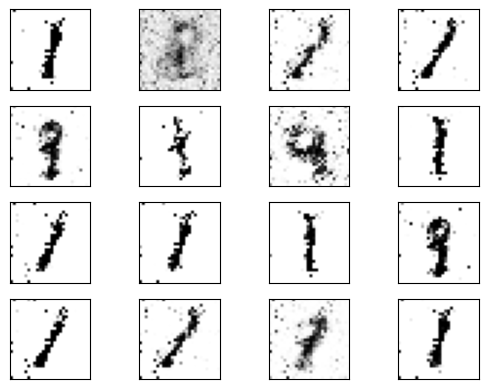

In [15]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

After fifty epochs of training, there are several generated digits that resemble the real ones. You can improve the results by considering more training epochs. As with the previous example, by using a fixed latent space samples tensor and feeding it to the generator at the end of each epoch during the training process, you can visualize the evolution of the training